In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.datasets import mnist


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
from jupyterthemes import jtplot
jtplot.style()

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

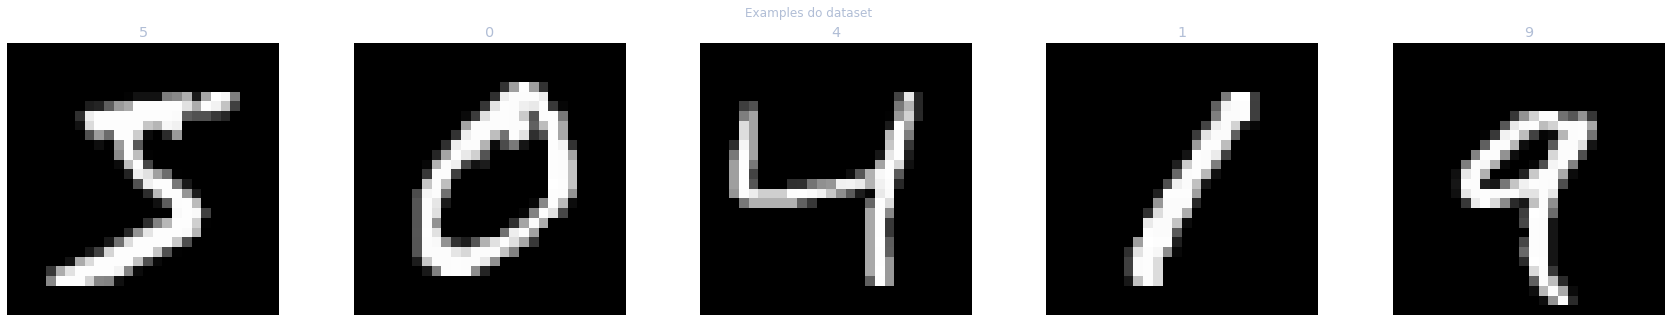

In [15]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 5))

for idx, image in enumerate(x_train[:5]):

    ax[idx].imshow(image, cmap='gray')
    ax[idx].axis('off')

    ax[idx].set_title(f'{y_train[idx]}')
    
fig.suptitle('Examples do dataset')

plt.show()

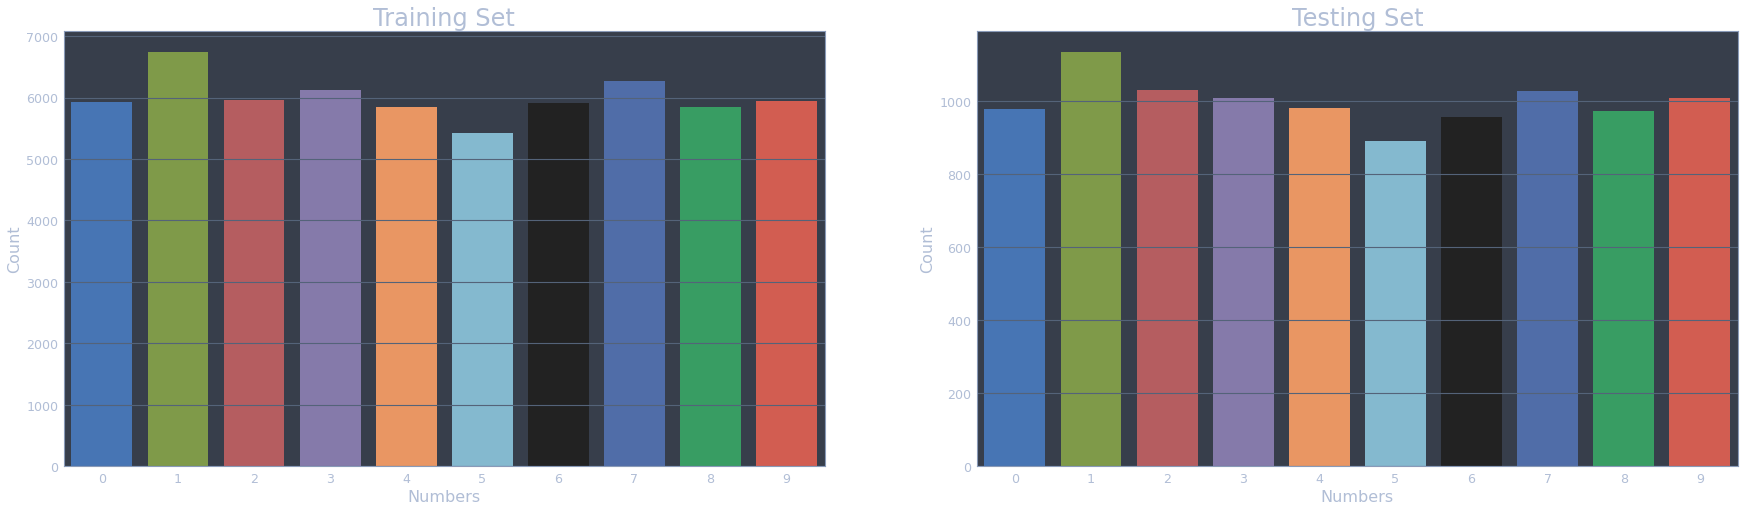

In [16]:
f,axes=plt.subplots(1,2,figsize=(30,8))
sns.countplot(x=y_train,ax=axes[0])
axes[0].set_title('Training Set',fontsize=24)
axes[0].set_xlabel('Numbers',fontsize=16)
axes[0].set_ylabel('Count',fontsize=16)

sns.countplot(x=y_test,ax=axes[1])
axes[1].set_title('Testing Set',fontsize=24)
axes[1].set_ylabel('Count',fontsize=16)
axes[1].set_xlabel('Numbers',fontsize=16);

In [17]:
# def reshape(array: np.array) -> np.array:
#     """
#         The samples in the input array are faltered. 
#     """
#     samples, w, h = array.shape

#     return array.reshape((samples, w * h))

# x_train = reshape(x_train)
# x_test = reshape(x_test)

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [22]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

2022-10-02 18:04:07.520942: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-02 18:04:07.520975: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: gentoo
2022-10-02 18:04:07.520984: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: gentoo
2022-10-02 18:04:07.521083: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-10-02 18:04:07.521105: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-02 18:04:07.521111: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-10-02 18:04:07.522388: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operat

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [24]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=10000,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=30),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)
    ]
)

Epoch 1/10000
844/844 [==============================] - 7s 8ms/step - loss: 0.5981 - acc: 0.8423 - val_loss: 0.1832 - val_acc: 0.9497 - lr: 0.0010
Epoch 2/10000
844/844 [==============================] - 6s 8ms/step - loss: 0.2544 - acc: 0.9341 - val_loss: 0.1504 - val_acc: 0.9642 - lr: 0.0010
Epoch 3/10000
844/844 [==============================] - 6s 8ms/step - loss: 0.2057 - acc: 0.9475 - val_loss: 0.1372 - val_acc: 0.9635 - lr: 0.0010
Epoch 4/10000
844/844 [==============================] - 6s 8ms/step - loss: 0.1854 - acc: 0.9547 - val_loss: 0.1397 - val_acc: 0.9692 - lr: 0.0010
Epoch 5/10000
844/844 [==============================] - 7s 8ms/step - loss: 0.1667 - acc: 0.9597 - val_loss: 0.1108 - val_acc: 0.9725 - lr: 0.0010
Epoch 6/10000
844/844 [==============================] - 6s 8ms/step - loss: 0.1530 - acc: 0.9625 - val_loss: 0.1172 - val_acc: 0.9715 - lr: 0.0010
Epoch 7/10000
844/844 [==============================] - 6s 8ms/step - loss: 0.1456 - acc: 0.9647 - val_loss: 0.

In [29]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/100
 66/844 [=>............................] - ETA: 1s - loss: 17.9840 - acc: 0.5637  

2022-08-12 23:08:34.492716: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


844/844 [==============================] - 3s 2ms/step - loss: 2.7943 - acc: 0.7462 - val_loss: 0.4204 - val_acc: 0.8987 - lr: 0.0010
Epoch 2/100
844/844 [==============================] - 1s 2ms/step - loss: 0.6298 - acc: 0.8514 - val_loss: 0.3173 - val_acc: 0.9318 - lr: 0.0010
Epoch 3/100
844/844 [==============================] - 1s 2ms/step - loss: 0.4921 - acc: 0.8813 - val_loss: 0.2647 - val_acc: 0.9363 - lr: 0.0010
Epoch 4/100
844/844 [==============================] - 1s 2ms/step - loss: 0.3889 - acc: 0.9039 - val_loss: 0.2304 - val_acc: 0.9472 - lr: 0.0010
Epoch 5/100
844/844 [==============================] - 1s 2ms/step - loss: 0.3168 - acc: 0.9198 - val_loss: 0.2055 - val_acc: 0.9510 - lr: 0.0010
Epoch 6/100
844/844 [==============================] - 1s 2ms/step - loss: 0.2636 - acc: 0.9304 - val_loss: 0.1724 - val_acc: 0.9575 - lr: 0.0010
Epoch 7/100
844/844 [==============================] - 1s 2ms/step - loss: 0.2299 - acc: 0.9371 - val_loss: 0.1591 - val_acc: 0.9573 - l

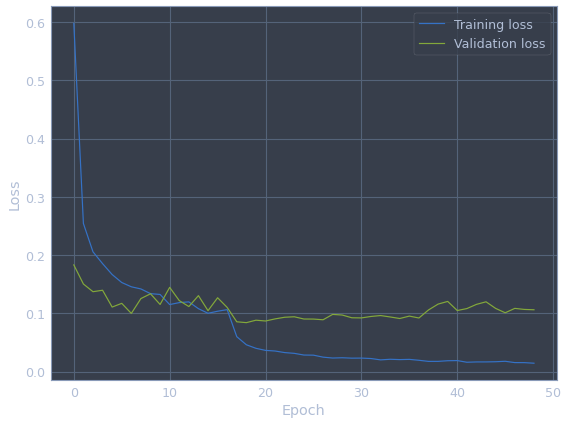

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [26]:
y_pred = model.predict(x_test)

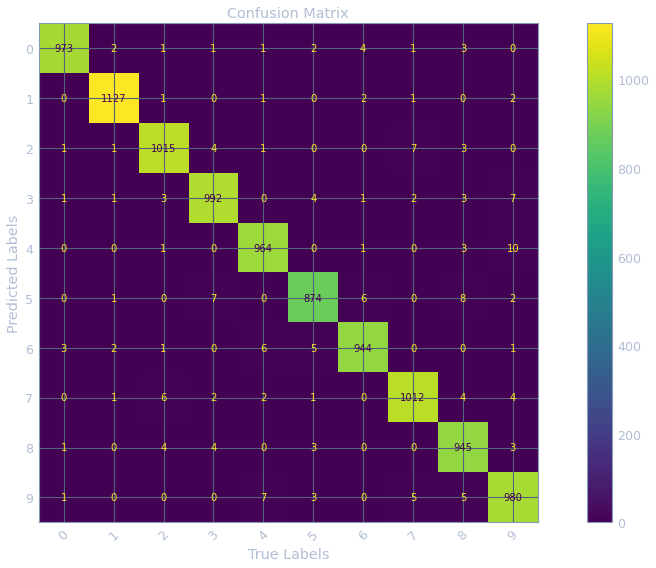

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(
    confusion_matrix([np.argmax(num) for num in y_pred], [np.argmax(num) for num in y_test], labels=list(range(10))),
    display_labels=list(range(10))
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
model.save('models/mnist_model_large.h5')

### Testing

In [29]:
model=load_model('models/mnist_model_large.h5')

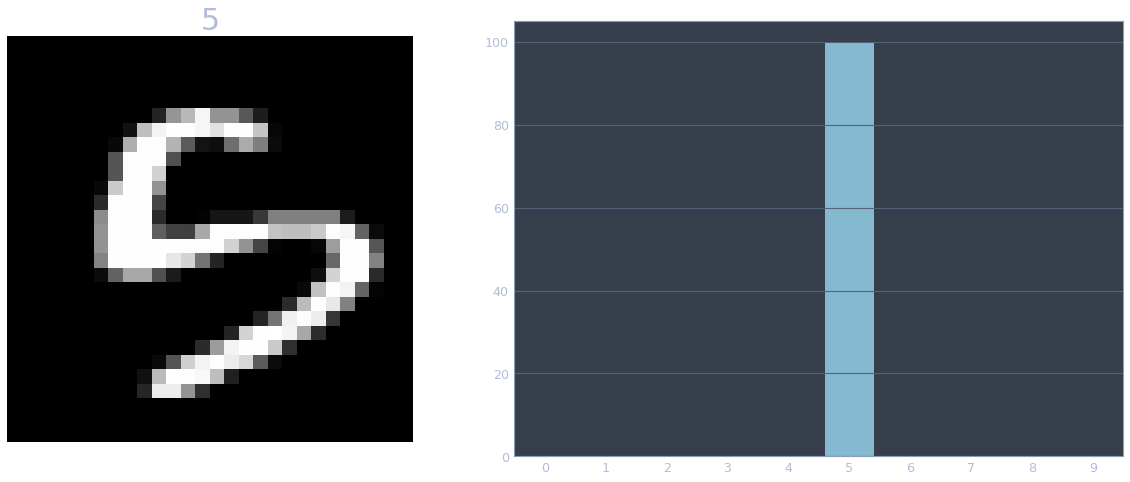

Prediction: 5


In [39]:
idx=np.random.randint(len(x_test))
data=x_test[idx]
data=data.reshape(1,data.shape[0],data.shape[1])
pred=model.predict(data)[0]
f,axes=plt.subplots(1,2,figsize=(20,8),gridspec_kw={'width_ratios': [2, 3]})
axes[0].imshow(data.reshape(28,28), cmap='gray')
axes[0].axis('off')
axes[0].set_title(f'{np.argmax(y_test[idx])}',fontsize=30)
sns.barplot(x=list(range(len(pred))),y=pred*100,ax=axes[1]);
plt.show()

print('Prediction:',np.argmax(pred))


In [18]:
x=list(range(len(pred)))
y=pred*100

In [19]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
y

array([9.1008662e-14, 1.1231370e-08, 9.9999985e+01, 1.4839067e-05,
       5.6419243e-08, 6.5570867e-13, 2.0671683e-08, 1.0566434e-06,
       2.5928790e-08, 6.1542698e-13], dtype=float32)

## API Processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential, load_model

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [4]:
def get_prediction(data):
#    model=load_model('../model/mnist_model.h5')
    plt.imshow(data)
    plt.show()
    

2022-10-02 03:06:52.093875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 03:06:52.153463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 03:06:52.153630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 03:06:52.154957: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

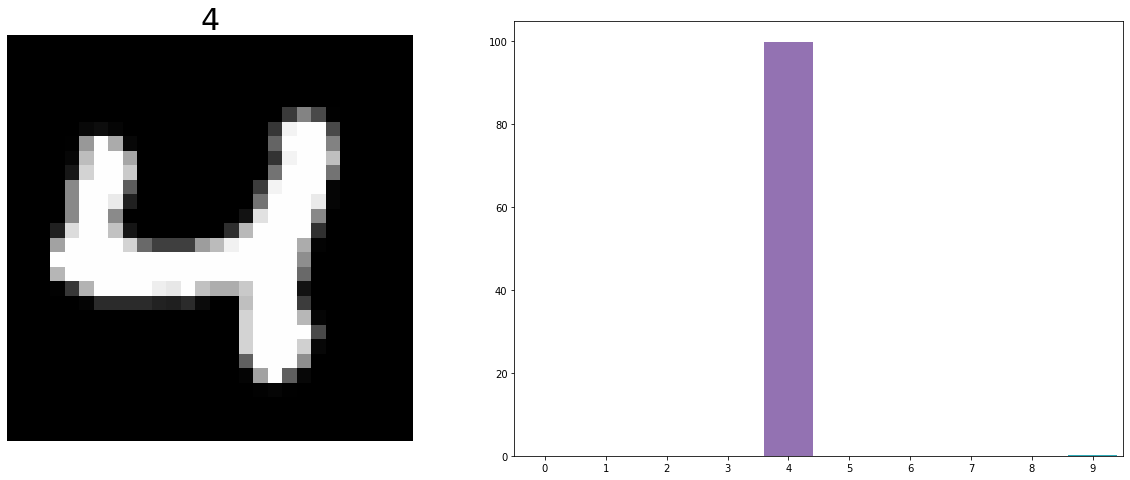

Prediction: 4


In [5]:
model=load_model('./models/mnist_model.h5')

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

idx=np.random.randint(len(x_test))
data=x_test[idx]
data=data.reshape(1,data.shape[0],data.shape[1])
pred=model.predict(data)[0]
f,axes=plt.subplots(1,2,figsize=(20,8),gridspec_kw={'width_ratios': [2, 3]})
axes[0].imshow(data.reshape(28,28), cmap='gray')
axes[0].axis('off')
axes[0].set_title(f'{np.argmax(y_test[idx])}',fontsize=30)
sns.barplot(x=list(range(len(pred))),y=pred*100,ax=axes[1]);
plt.show()

print('Prediction:',np.argmax(pred))

In [2]:
payload_file='../app_old/payload.pkl'
payload=pickle.load(open(payload_file,'rb'))

In [3]:
x=payload['length']
y=payload['width']
data=payload['data']

In [4]:
len(data)

122500

In [14]:
img=[data[i:i+y] for i in range(0,len(data),y)]

In [15]:
img=np.array(img)

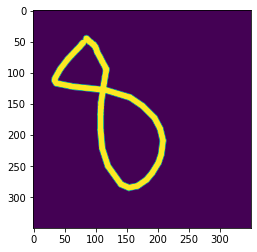

In [16]:
plt.imshow(img)

In [12]:
res = cv2.resize(img, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

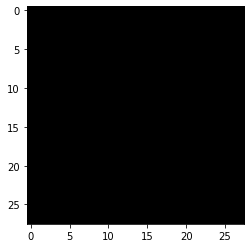

In [13]:
plt.imshow(res)

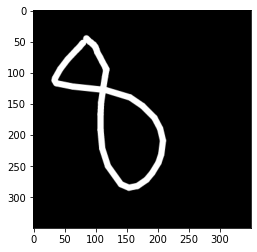

In [11]:
plt.imshow(img,cmap='gray')

In [12]:
def scale(im, nR, nC):
  nR0 = len(im)     # source number of rows 
  nC0 = len(im[0])  # source number of columns 
  return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)]

In [13]:
img.shape

(350, 350)

In [14]:
small_img=scale(im=img,nR=28, nC=28)

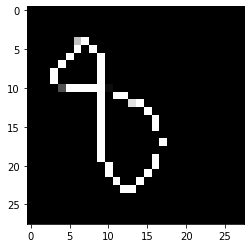

In [24]:
plt.imshow(small_img,cmap='gray')

In [16]:
data=np.array(small_img)

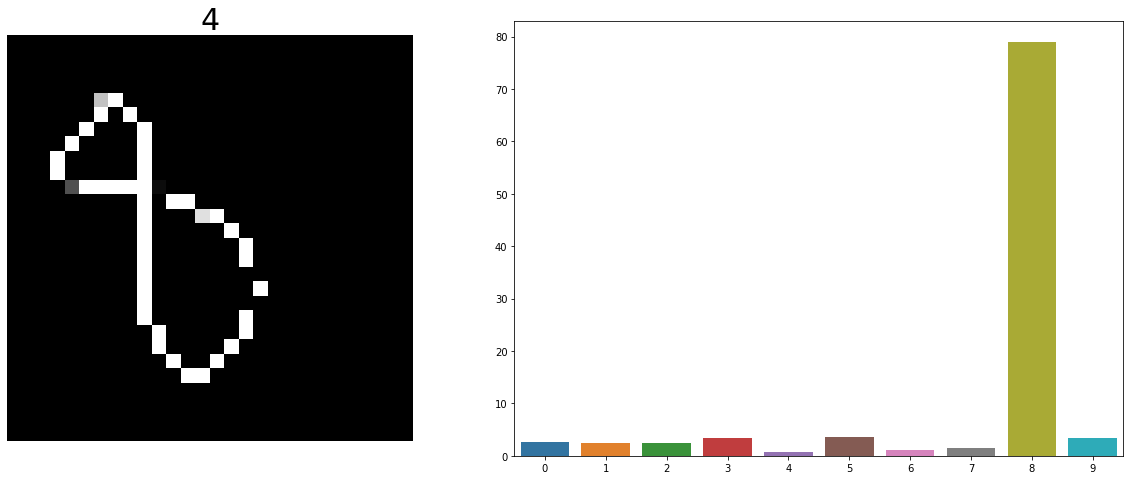

Prediction: 8


In [17]:
data=data.reshape(1,data.shape[0],data.shape[1])
pred=model.predict(data)[0]
f,axes=plt.subplots(1,2,figsize=(20,8),gridspec_kw={'width_ratios': [2, 3]})
axes[0].imshow(data.reshape(28,28), cmap='gray')
axes[0].axis('off')
axes[0].set_title(f'{np.argmax(y_test[idx])}',fontsize=30)
sns.barplot(x=list(range(len(pred))),y=pred*100,ax=axes[1]);
plt.show()

print('Prediction:',np.argmax(pred))

In [18]:
pred

array([0.02605348, 0.02354415, 0.02386774, 0.03318873, 0.00643733,
       0.03575059, 0.01152867, 0.01541223, 0.7905819 , 0.0336352 ],
      dtype=float32)

In [19]:
pred.shape

(10,)

In [20]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
width , height = 28,28
resize_image = np.zeros(shape=(width,height))

for W in range(width):
    for H in range(height):
        new_width = int( W * img.shape[0] / width )
        new_height = int( H * img.shape[1] / height )
        resize_image[W][H] = img[new_width][new_height]

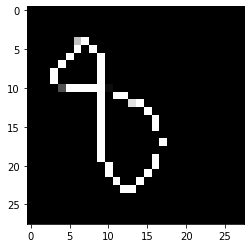

In [25]:
plt.imshow(resize_image,cmap='gray')

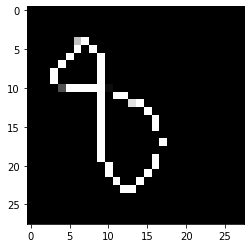

In [26]:
plt.imshow(small_img,cmap='gray')